# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class.

Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



##ANSWER:

#1:

Let q be answering quickly, p be passing the class, and f be failing the class

By Bayes' Theorem:  
P(p | q) = \frac{P(q | p) P(p)}{P(q)}

By law of total probability

P(q) = P(q | p) P(p) + P(q | f) P(f)

P(q) = (0.6)(0.9) + (0.3)(0.1) = 0.54 + 0.03 = 0.57

P(p | q) = (0.6)(0.9)/0.57 = 0.54/0.57 = 0.947

#2:
The **likelihood function** is a **Multinomial distribution**:
$$
p(x | \theta, n) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i}
$$

The **prior** is a **Dirichlet distribution**:
$$
p(\theta | \boldsymbol{\alpha}) = \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^k \theta_i^{\alpha_i - 1}
$$

$$B(\boldsymbol{\alpha}) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}
$$
Using **Bayes' theorem**:
$$
p(\theta | x, n, \boldsymbol{\alpha}) = \frac{p(x | \theta, n) p(\theta | \boldsymbol{\alpha})}{p(x)}
$$

$$
p(\theta | x, n, \boldsymbol{\alpha}) =
\frac{\left(\frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i}\right) \left(\frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^k \theta_i^{\alpha_i - 1}\right)}{p(x)}
$$

$$
p(\theta | x, n, \boldsymbol{\alpha}) =
\frac{\frac{n!}{x_1! x_2! \cdots x_k!} \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}}{p(x)}
$$

$$
p(\theta | x, n, \boldsymbol{\alpha}) \propto \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}
$$

The posterior is a **Dirichlet distribution** with the following parameterization:
$$
\boldsymbol{\alpha}' = \boldsymbol{\alpha} + x
$$


### Final Answer:
$$
p(\theta | x, n, \boldsymbol{\alpha}) = \text{Dirichlet}(\boldsymbol{\alpha}')
$$
where:
$$
\boldsymbol{\alpha}' = (\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_k + x_k)
$$

#3 Done in the code cell below

In [1]:
!pip install -U kaleido


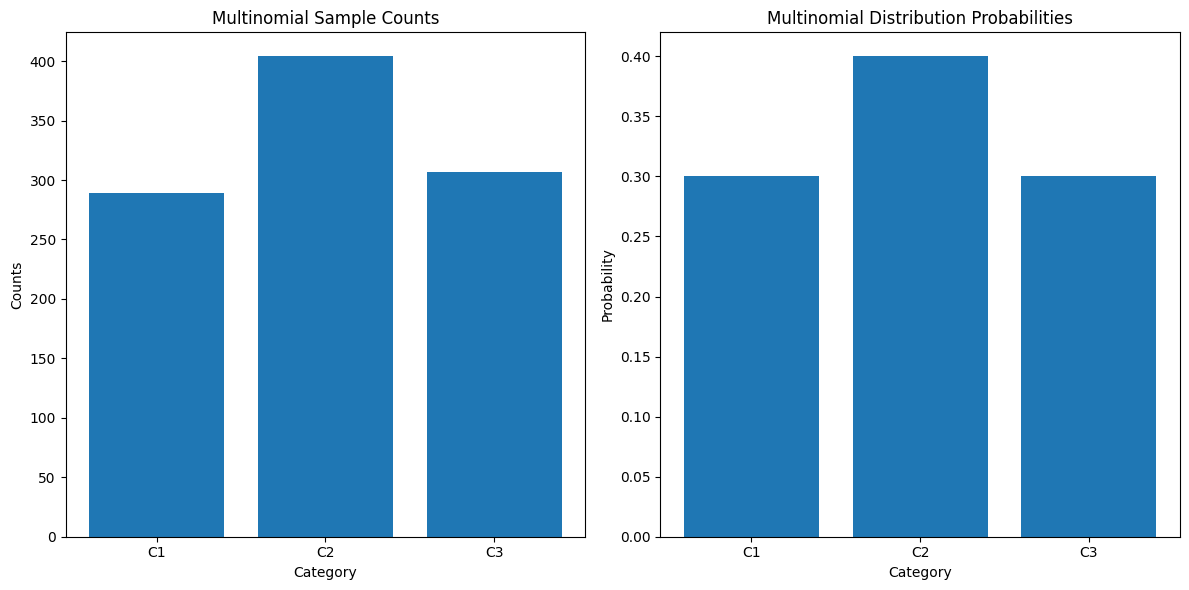

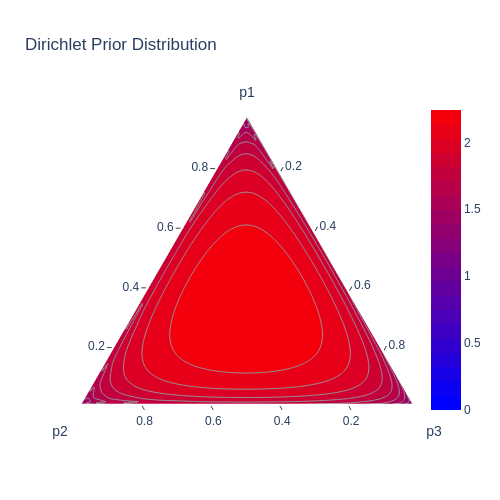

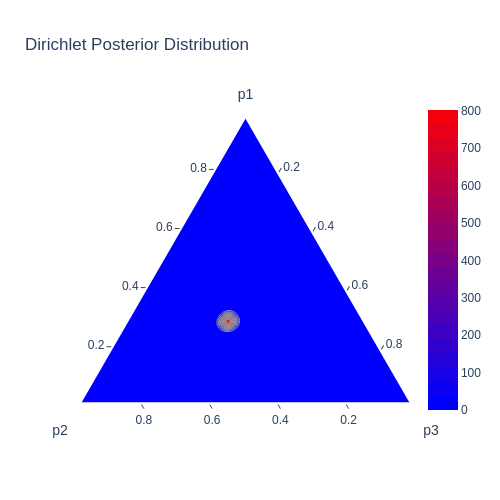

In [2]:
import numpy as np
import plotly.figure_factory as ff
from scipy import stats
import kaleido
np.random.seed(42)

probabilities = [0.3, 0.4, 0.3]
n_trials = 1000
multinomial_sample = np.random.multinomial(n_trials, probabilities)

categories = ['C1', 'C2', 'C3']
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
#Counts
ax[0].bar(categories, multinomial_sample)
ax[0].set_title('Multinomial Sample Counts')
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Category')

#dist
ax[1].bar(categories, probabilities)
ax[1].set_title('Multinomial Distribution Probabilities')
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Category')

plt.tight_layout()
plt.show()

p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

alpha_prior = np.array([1.1, 1.1, 1.1])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

alpha_posterior = alpha_prior + multinomial_sample
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

#prior
fig = ff.create_ternary_contour(
    p.T,
    dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    ncontours=20
)
fig.update_layout(title='Dirichlet Prior Distribution')
fig.show('png')

#posterior
fig = ff.create_ternary_contour(
    p.T,
    dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    ncontours=20,
    showscale=True
)
fig.update_layout(title='Dirichlet Posterior Distribution')
fig.show('png')
